In [1]:
### pyDANDIA, PyTorch comparison ###
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
from astropy.stats import mad_std
%matplotlib inline

In [2]:
#path = '/media/james/Seagate_Expansion_Drive#2'
#path = '~/Downloads'
path = os.getcwd()
pyDANDIA_S10_file = os.path.join(path, 'pyDANDIA_S10_CUDA.txt')
PyTorch_S10_file = os.path.join(path, 'PyTorch_S10_CUDA.txt')

In [3]:
pyDANDIA_S10, PyTorch_S10 = np.genfromtxt(pyDANDIA_S10_file), np.genfromtxt(PyTorch_S10_file)
print(pyDANDIA_S10.shape, PyTorch_S10.shape)

(32824, 13) (32815, 13)


In [4]:
# PyTorch_S10 is a subset of pyDANDIA_S10
# make sure we're comparing like with like
pyd_s = pyDANDIA_S10[:, 9]
pyt_s = PyTorch_S10[:, 9]
mask = []
for indx in range(0, len(pyd_s)):
    try:
        pyt_indx = np.where(pyt_s == pyd_s[indx])[0][0]
        mask.append(0)
    except IndexError:
        mask.append(1)

mask = np.array(mask)
print(np.sum(mask), mask.shape)
print(pyDANDIA_S10[:, 9][np.where(mask == 0)].shape)
pyDANDIA_S10 = pyDANDIA_S10[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]][np.where(mask == 0)]
#PyTorch_S10 = PyTorch_S10[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]][np.where(mask == 0)]

for i in range(7, 13):
    print(np.sum(pyDANDIA_S10[:, i]) == np.sum(PyTorch_S10[:, i]))
    
print(pyDANDIA_S10.shape, PyTorch_S10.shape)

9 (32824,)
(32815,)
True
True
True
True
True
True
(32815, 13) (32815, 13)


In [5]:
## add in any extra data ##
path = '/media/james/Seagate_Expansion_Drive#2'
pyDANDIA_S10_file_cpu = os.path.join(path, 'pyDANDIA_S10.txt')
PyTorch_S10_file_cpu = os.path.join(path, 'PyTorch_S10.txt')

pyDANDIA_S10_cpu, PyTorch_S10_cpu = np.genfromtxt(pyDANDIA_S10_file_cpu), np.genfromtxt(PyTorch_S10_file_cpu)

In [6]:
print(pyDANDIA_S10_cpu.shape, PyTorch_S10_cpu.shape)

# PyTorch_S10 is a subset of pyDANDIA_S10
# make sure we're comparing like with like
pyd_s = pyDANDIA_S10_cpu[:, 9]
pyt_s = PyTorch_S10_cpu[:, 9]
mask = []
for indx in range(0, len(pyd_s)):
    try:
        pyt_indx = np.where(pyt_s == pyd_s[indx])[0][0]
        mask.append(0)
    except IndexError:
        mask.append(1)

mask = np.array(mask)
print(np.sum(mask), mask.shape)
print(pyDANDIA_S10_cpu[:, 9][np.where(mask == 0)].shape)
pyDANDIA_S10_cpu = pyDANDIA_S10_cpu[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]][np.where(mask == 0)]

for i in range(7, 13):
    print(np.sum(pyDANDIA_S10_cpu[:, i]) == np.sum(PyTorch_S10_cpu[:, i]))

print(pyDANDIA_S10_cpu.shape, PyTorch_S10_cpu.shape)

(9909, 13) (9904, 13)
5 (9909,)
(9904,)
True
True
True
True
True
True
(9904, 13) (9904, 13)


In [7]:
#pyDANDIA_sim_data = np.vstack((pyDANDIA_S10, pyDANDIA_S10_cpu))
#PyTorch_sim_data = np.vstack((PyTorch_S10, PyTorch_S10_cpu))

pyDANDIA_sim_data1 = np.genfromtxt('pyDANDIA_S10_PSFfit_faintest_sources.txt')
external_drive = '/media/jah94/Seagate_Expansion_Drive#2/Simulation_test_pyDANDIA/code'
pyDANDIA_sim_data2 = np.genfromtxt(os.path.join(external_drive,'pyDANDIA_S10_PSFfit_faintest_sources_otherPC.txt'))
pyDANDIA_sim_data = np.vstack((pyDANDIA_sim_data1, pyDANDIA_sim_data2))
print(pyDANDIA_sim_data.shape)


#out = np.vstack((np.sum(kernel), B0, MSE, MFB, MFV, F_measured, var_min,
#                n_sources, reference_psf_sigma, sky, kernel_sigma,
#                SNR_ref, SNR_targ))

(22899, 14)


In [8]:
# calculate photometric residuals and add column to array
def resids(data_array):
    F_meas = data_array[:,5]
    sigma_min = np.sqrt(data_array[:,6])
    nr = F_meas/sigma_min
    data_array = np.concatenate((data_array, nr[:, None]), axis=1)
    return data_array

pyDANDIA_sim_data = resids(pyDANDIA_sim_data)
#PyTorch_sim_data = resids(PyTorch_sim_data)
print(pyDANDIA_sim_data.shape)#, PyTorch_sim_data.shape)

(22899, 15)


In [9]:
# pd + sns = visualisation goodness
import seaborn as sns
import pandas as pd

In [10]:
pyDANDIA_df = pd.DataFrame(pyDANDIA_sim_data, columns=['P', 'B0', 'MSE', 'MFB', 'MFV',
                                                      'F_meas', 'var_min', 'n_sources', 'phi_r',
                                                      'sky', 'phi_k', 'SNR_ref', 'SNR_targ',
                                                       'F_max/F_total','Phot resids'])
## drop unecessary columns
pyDANDIA_df = pd.DataFrame.drop(pyDANDIA_df, columns=['B0', 'F_meas', 'var_min', 'n_sources', 'sky'])

## simple exploratory pairplot
#sns.pairplot(pyDANDIA_df)

In [11]:
# SNR ratio
pyDANDIA_df['SNR_targ/SNR_ref'] = pyDANDIA_df['SNR_targ']/pyDANDIA_df['SNR_ref']


# categories
# SNR: 3 categories
# 8 < SNR_targ < 40, 40 < SNR_targ < 200, 200 < SNR_targ < 1000
cat1, cat2, cat3 = '8 < SNR_targ < 40', '40 < SNR_targ < 200', '200 < SNR_targ < 1000'

pyDANDIA_df['SNR_regime'] = 0
#df.a[df.a < 10] = 3
pyDANDIA_df['SNR_regime'][(8. < pyDANDIA_df['SNR_targ']) & (pyDANDIA_df['SNR_targ'] < 40.)] = cat1
pyDANDIA_df['SNR_regime'][(40. < pyDANDIA_df['SNR_targ']) & (pyDANDIA_df['SNR_targ'] < 200.)] = cat2
pyDANDIA_df['SNR_regime'][(200. < pyDANDIA_df['SNR_targ']) & (pyDANDIA_df['SNR_targ'] < 1000.)] = cat3

pyDANDIA_df_cut = pyDANDIA_df[pyDANDIA_df['SNR_regime']!= 0]

# set to categorical type
pyDANDIA_df_cut['SNR_regime'] = pyDANDIA_df_cut['SNR_regime'].astype('category')

print(pyDANDIA_df_cut.dtypes)
print(pyDANDIA_df_cut)

P                    float64
MSE                  float64
MFB                  float64
MFV                  float64
phi_r                float64
phi_k                float64
SNR_ref              float64
SNR_targ             float64
F_max/F_total        float64
Phot resids          float64
SNR_targ/SNR_ref     float64
SNR_regime          category
dtype: object
              P         MSE       MFB       MFV     phi_r     phi_k  \
0      0.992166  807.308135 -0.000935  0.988782  2.030474  0.514639   
1      0.993455  708.583007 -0.010860  0.945002  1.285686  2.498744   
3      1.093369  684.571390 -0.023219  0.927565  0.612228  1.832877   
4      0.998778  635.187580 -0.037297  0.973395  2.432487  2.173117   
6      1.036182   35.054279  0.011081  0.979712  1.775967  2.459727   
...         ...         ...       ...       ...       ...       ...   
22891  0.995918  226.647984 -0.074450  0.971689  1.347169  1.917998   
22892  1.033034  866.651417 -0.015720  0.995842  1.945016  1.070997   

/home/jah94/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/jah94/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/jah94/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jah94/anaconda3/lib/python3.7/s

In [12]:
# photometric accuracy metrics for different SNR regimes
cats = [cat1, cat2, cat3]
def metrics(df):
    for cat in cats:
        #print(df['SNR_regime'][df['SNR_regime'] == cat])
        
        MSEs = df['MSE'][df['SNR_regime'] == cat]
        MSEs = df['MSE'][df['SNR_regime'] == cat]
        MSEs = df['MSE'][df['SNR_regime'] == cat]


        nr = df['Phot resids'][df['SNR_regime'] == cat]
        MPB = 1./len(nr) * np.sum(nr)
        MPV = 1./(len(nr) - 1) * np.sum((nr - MPB)**2)
        MedPB = np.median(nr)
        MedPV = (mad_std(nr))**2
        print('Category:', cat)
        print('N_set:', len(nr))
        print('MPB:', MPB)
        print('MPV:', MPV)
        print('MedPB:', MedPB)
        print('MedPV:', MedPV)
        
metrics(pyDANDIA_df_cut)

Category: 8 < SNR_targ < 40
N_set: 5093
MPB: -0.0312070054962684
MPV: 1.1964541442902952
MedPB: -0.025530947005114723
MedPV: 1.1477250747232715
Category: 40 < SNR_targ < 200
N_set: 5429
MPB: -0.042471636198015444
MPV: 1.266540239312598
MedPB: -0.03910228393712205
MedPV: 1.2290398381772827
Category: 200 < SNR_targ < 1000
N_set: 6071
MPB: -0.0982586842268904
MPV: 1.2972175097763083
MedPB: -0.10055120618407923
MedPV: 1.1889558560164177


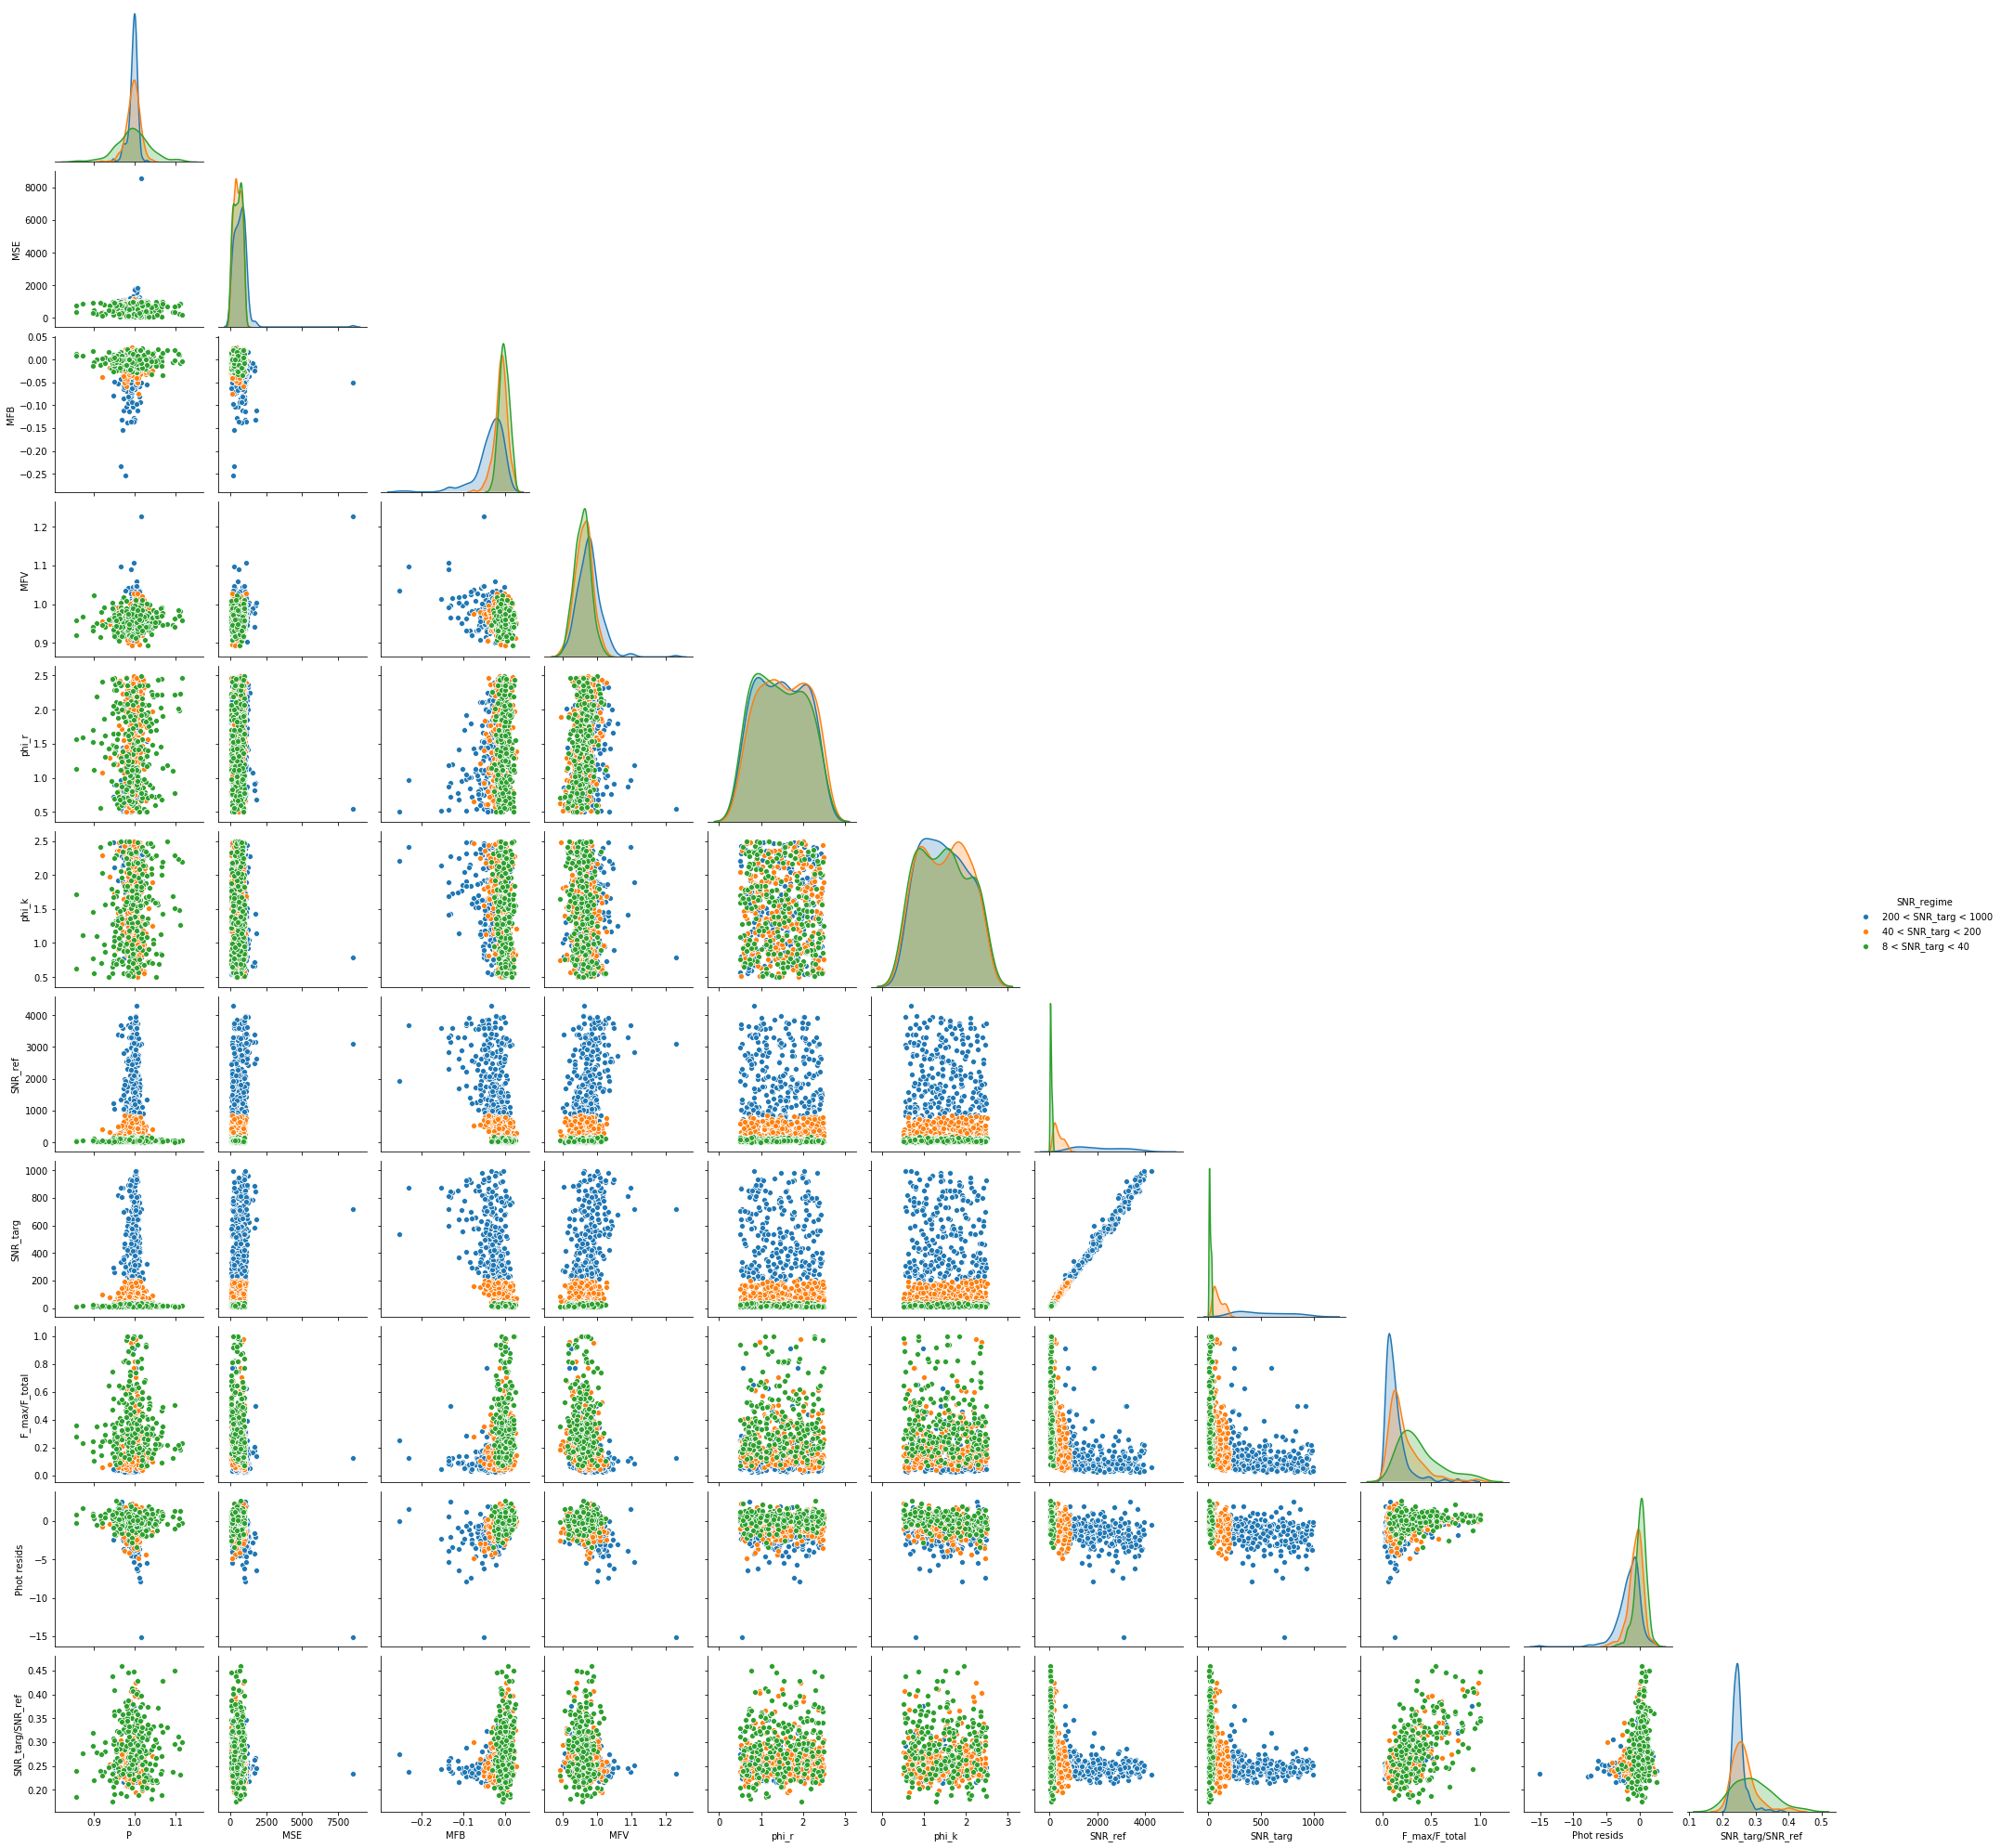

In [46]:
# drop uneccesary columns
#pyDANDIA_df_cut = pd.DataFrame.drop(pyDANDIA_df_cut, columns=['SNR_targ', 'SNR_ref'])

# pairplot split into SNR regime
sns.pairplot(pyDANDIA_df_cut, hue='SNR_regime', corner=True)

1.0


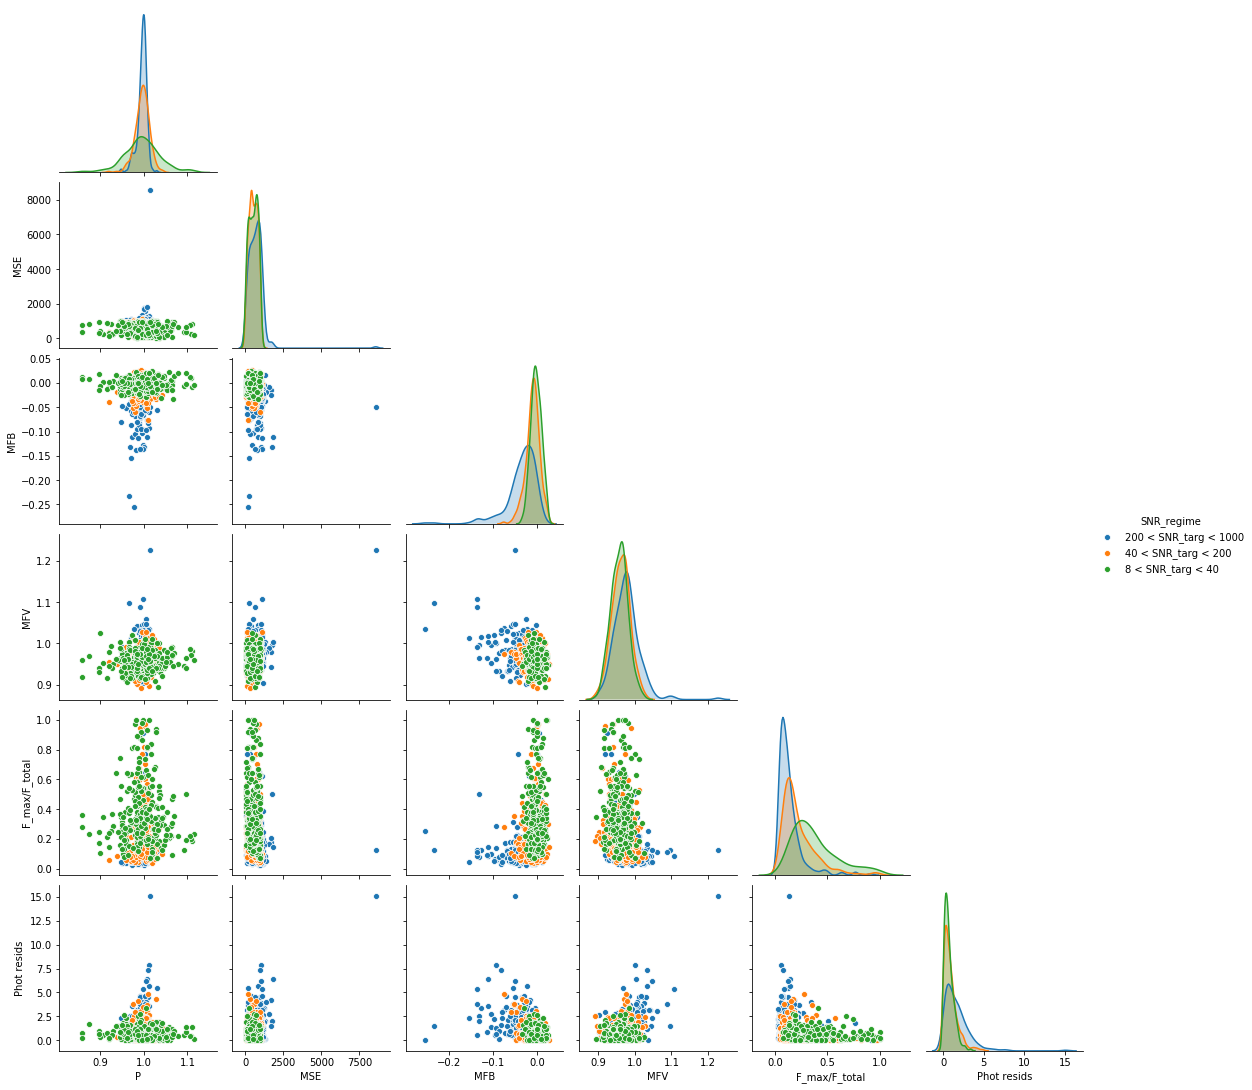

In [49]:

final_cut = pd.DataFrame.drop(pyDANDIA_df_cut, columns=['phi_r', 'phi_k', 'SNR_targ', 'SNR_ref',
                                                       'SNR_targ/SNR_ref'])
# absolute value of residuals
final_cut['Phot resids'] = np.abs(final_cut['Phot resids'])
sns.pairplot(final_cut, hue='SNR_regime', corner=True)

print(np.max(final_cut['F_max/F_total']))

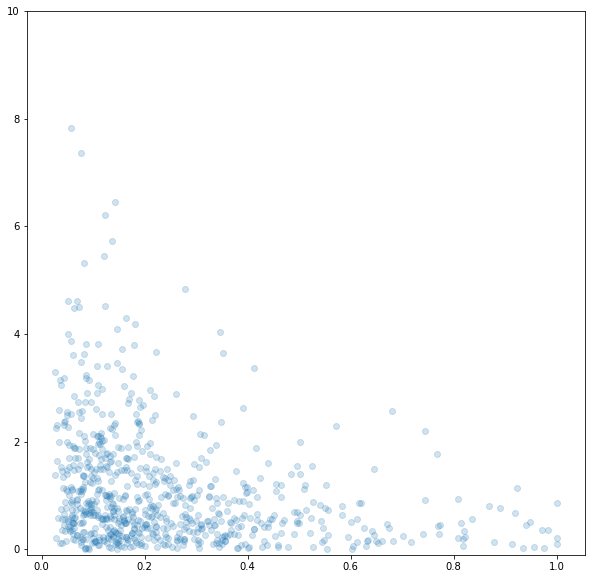

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(final_cut['F_max/F_total'], final_cut['Phot resids'], alpha=0.2)
plt.ylim(-0.1, 10)
plt.show()

In [ ]:
# further split into resolution regimes
# 1) phi_r > 1.5, phi_k > 1.5
# 2) phi_r > 1.5, phi_k < 1.5
# 3) phi_r < 1.5, phi_k > 1.5
# 4) phi_r < 1.5, phi_k < 1.5

# 1) phi_r > 1.5, phi_k > 1.5
sns.pairplot(final_cut[(pyDANDIA_df_cut['phi_r']>1.5) & (pyDANDIA_df_cut['phi_k']>1.5)],
             hue='SNR_regime', corner=True)

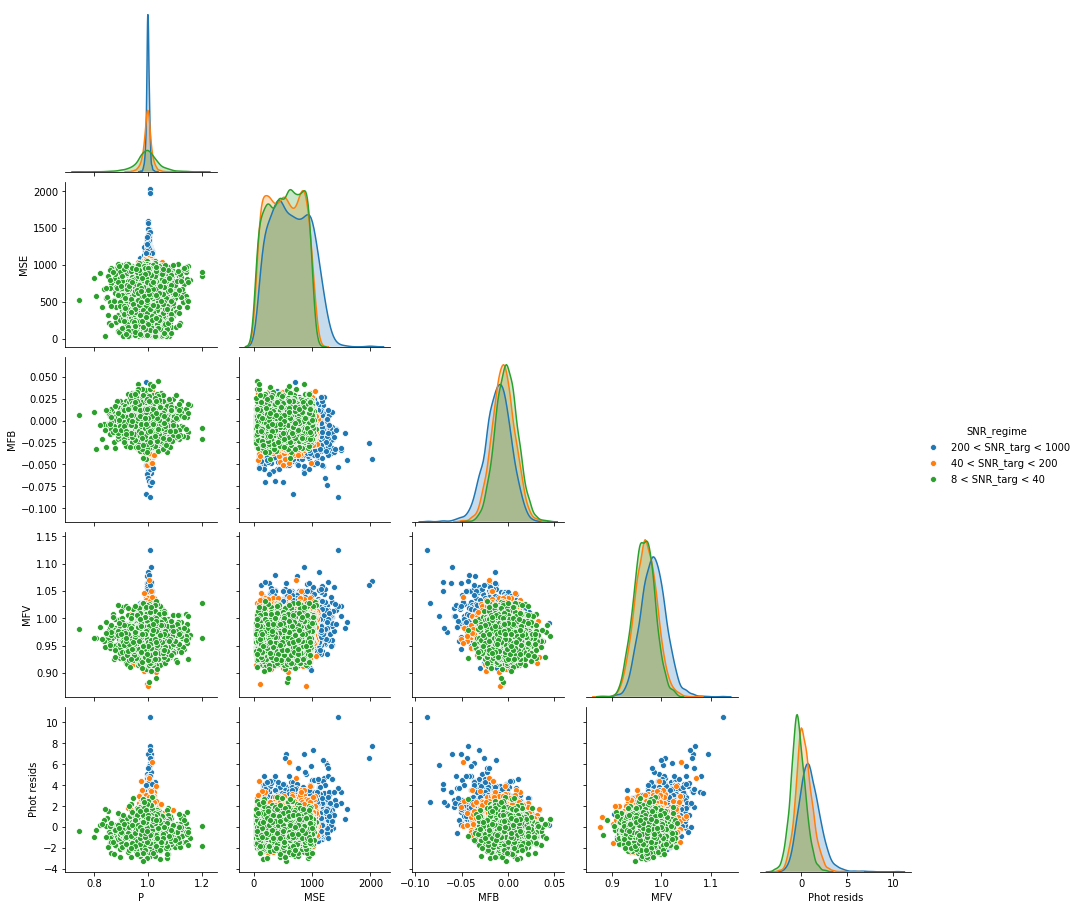

In [15]:
# 2) phi_r > 1.5, phi_k < 1.5
sns.pairplot(final_cut[(pyDANDIA_df_cut['phi_r']>1.5) & (pyDANDIA_df_cut['phi_k']<1.5)],
             hue='SNR_regime', corner=True)

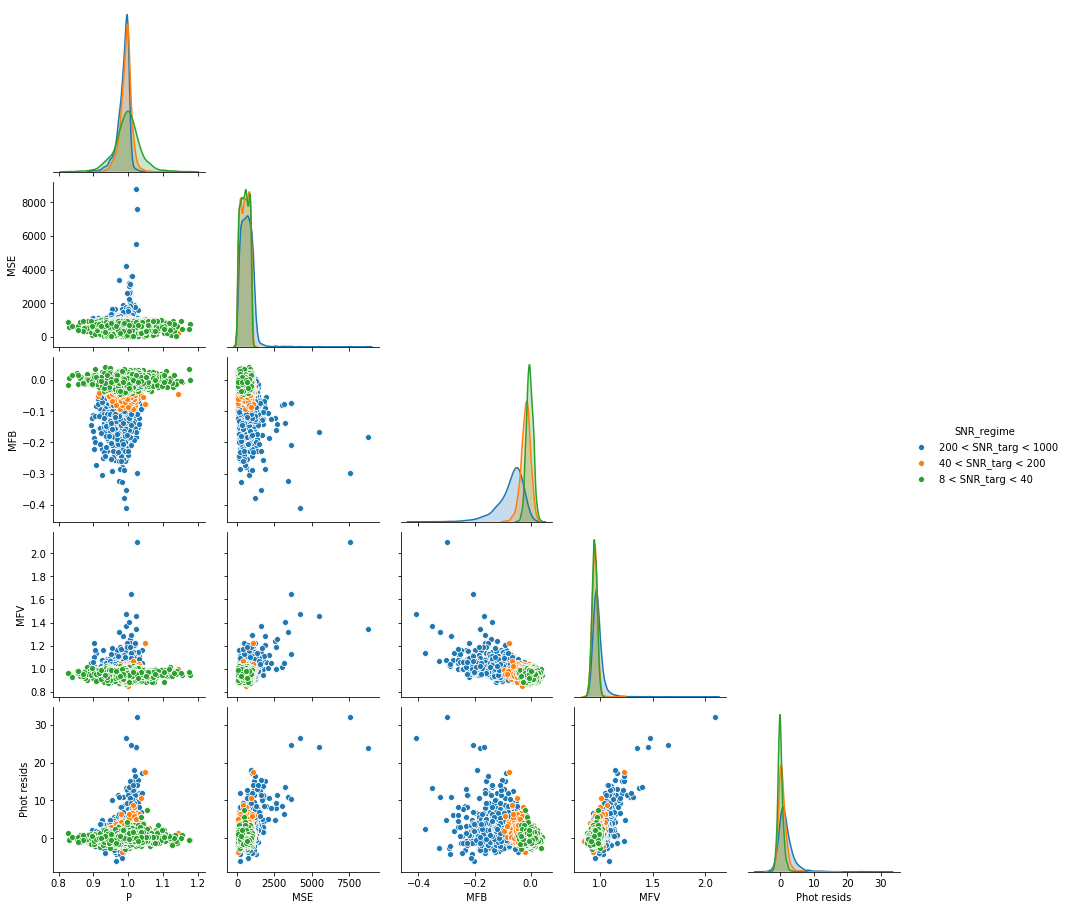

In [16]:
# 3) phi_r < 1.5, phi_k > 1.5
sns.pairplot(final_cut[(pyDANDIA_df_cut['phi_r']<1.5) & (pyDANDIA_df_cut['phi_k']>1.5)],
             hue='SNR_regime', corner=True)

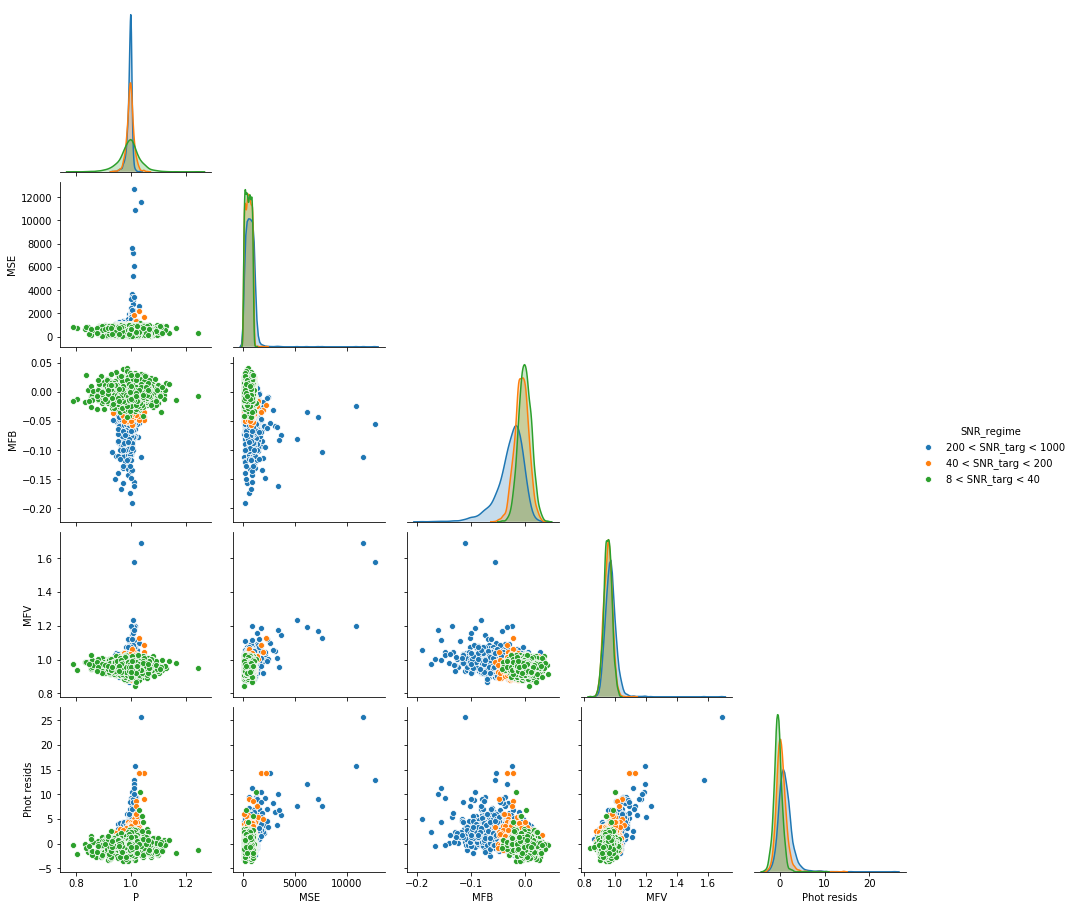

In [17]:
# 4) phi_r < 1.5, phi_k < 1.5
sns.pairplot(final_cut[(pyDANDIA_df_cut['phi_r']<1.5) & (pyDANDIA_df_cut['phi_k']<1.5)],
             hue='SNR_regime', corner=True)

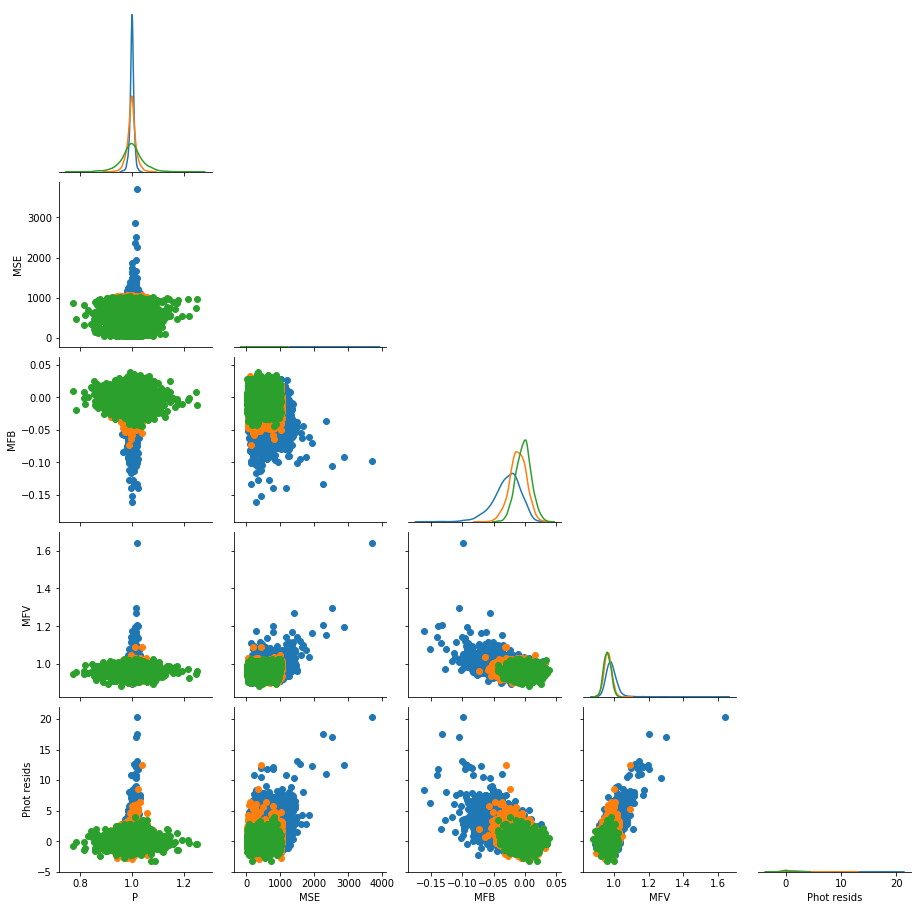

In [24]:
# 1) phi_r > 1.5, phi_k > 1.5
pg = sns.PairGrid(final_cut[(pyDANDIA_df_cut['phi_r']>1.5) & (pyDANDIA_df_cut['phi_k']>1.5)],
             hue='SNR_regime', corner=True)

pg = pg.map_diag(sns.kdeplot)
pg = pg.map_lower(plt.scatter)